In [1]:
%load_ext autoreload
%autoreload 2

In [9]:
import pandas as pd
from modules.file import CPandasFile
from modules.drawer import CDrawer
from modules.hierarchical import CHierarchical

In [3]:
drawer = CDrawer()

1. Đọc dữ liệu `shopping_data.csv`

In [4]:
shopping_raw = CPandasFile().readCsv(r'./data/shopping_data.csv')

shopping_raw

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


1.1. Chỉ cần hai feature là `Annual Income (k$)` và `Spending Score (1-100)`

In [5]:
shopping_raw = shopping_raw.iloc[:, 3:]

shopping_raw

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


1.1.1. Trực quan hóa hai feature `Annual Income (k$)` và `Spending Score (1-100)` lên scatter-plot

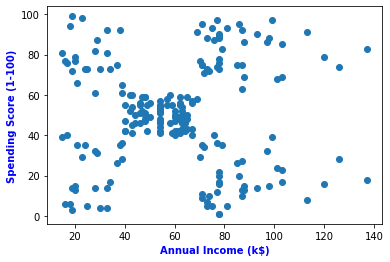

In [6]:
drawer.scatter(shopping_raw.iloc[:, 0], shopping_raw.iloc[:, 1])

2. Build model

In [7]:
shopping_raw.iloc[:, 0]

0       15
1       15
2       16
3       16
4       17
      ... 
195    120
196    126
197    126
198    137
199    137
Name: Annual Income (k$), Length: 200, dtype: int64

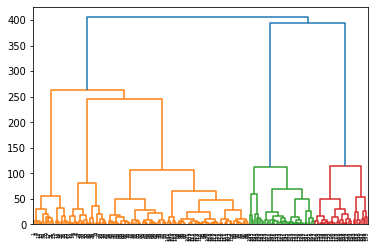

In [8]:
drawer.dendrogram(shopping_raw)

3. Chọn thử `k-value` bằng 5 để thử nghiệm model.

In [10]:
model_k5 = CHierarchical(shopping_raw)
model_k5.initModel(5)

3.1. Xem label của các sample để biết chúng thuộc cluster nào

In [12]:
model_k5.showSampleLabels()

,Annual Income (k$),Spending Score (1-100),label
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


3.2. Trực quan hóa kết quả training

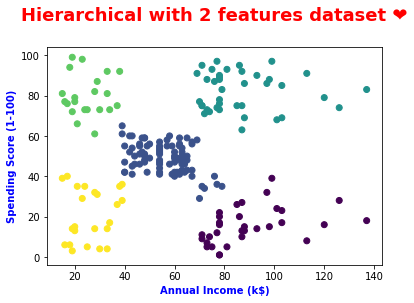

In [16]:
model_k5.visualModelTraining()